In [44]:
import pandas as pd

from pathlib import Path
import glob, os

import os.path

# https://github.com/pemagrg1/text-classification

In [45]:
df = pd.read_pickle("./compilation_clean.pkl")

In [46]:
print(len(df)," elements")
df.head()

3059  elements


,AutoPay,BidCount,BuyItNowAvailable,ConditionDescription,ConditionDisplayName,ConditionID,ConvertedBuyItNowPrice,Country,Description,DiscountPriceInfo,...,PrimaryCategoryID,PrimaryCategoryName,Quantity,QuantityAvailableHint,QuantityThreshold,TimeLeft,Title,ViewItemURLForNaturalSearch,_currencyID,value
ItemID,,,,,,,,,,,,,,,,,,,,,
132529667929,false,0,NaN,NaN,Gebraucht,3000,NaN,DE,Philips ATL Dio Stiftsonde CW 3.2 MM ...,NaN,...,71927,Business & Industrie:Medizin & Labor:Medizinis...,NaN,NaN,NaN,P5DT22H26M31S,Philips ATL Dio Stiftsonde CW Doppler Pencil P...,https://www.ebay.com/itm/Philips-ATL-Dio-Stift...,USD,164.77
112314171710,false,0,NaN,NaN,Gebraucht,3000,NaN,DE,"Kretz Endovaginalsonde 5.0 MHz, Typ: E. V 48 H...",NaN,...,71927,Business & Industrie:Medizin & Labor:Medizinis...,NaN,NaN,NaN,P22DT18H5M31S,Kretz Endovaginal 5.0 MHz E.V 48 HD Ultrascha...,https://www.ebay.com/itm/Kretz-Endovaginal-5-0...,USD,326.79
173300186560,true,0,NaN,NaN,New,1000,NaN,GB,Comline Stabiliser Link BarIn order to check t...,NaN,...,33592,Vehicle Parts & Accessories:Car Parts:Suspensi...,NaN,MoreThan,10,P2DT3H4M3S,Comline Front Right Stabiliser Link Bar CSL604...,https://www.ebay.com/itm/Comline-Front-Right-S...,USD,19.25
123392052629,false,0,NaN,NaN,Gebraucht,3000,NaN,DE,Ultraschallsonde ATL / Philips P4-1 (Cardia...,NaN,...,71927,Business & Industrie:Medizin & Labor:Medizinis...,NaN,NaN,NaN,P25DT14H57M39S,Ultraschallsonde ATL / PHILIPS P4-1 (Cardiac S...,https://www.ebay.com/itm/Ultraschallsonde-ATL-...,USD,329.54
264514802006,true,0,NaN,GE Healthcare Corometrics Ultrasound Transduce...,Used,3000,NaN,GB,GE Healthcare Corometrics Ultrasound Transduce...,NaN,...,100006,"Business, Office & Industrial:Healthcare, Lab ...",NaN,NaN,NaN,P27DT22H14M8S,GE Healthcare Corometrics Ultrasound Transduce...,https://www.ebay.com/itm/GE-Healthcare-Coromet...,USD,190.32


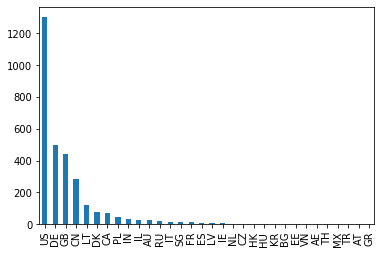

In [47]:
df.Country.value_counts().plot(kind='bar')

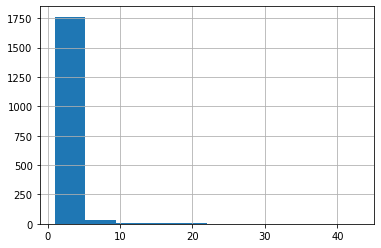

In [48]:
df.value.value_counts().hist()

In [52]:
DFxl = df[["ViewItemURLForNaturalSearch","Title","Country","Description"]].reset_index()
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk("/home/kelu/ultrasound/ebaystrove/images/") for f in filenames if os.path.splitext(f)[1] == '.jpg']
imagesID = [x.split(".")[-2].split("/")[-1] for x in images]
LIMIT = len('/home/kelu/ultrasound/ebaystrove/images/233384138652.jpg')
L = len("/home/kelu/ultrasound/ebaystrove/images/")
DFxl["group"] = "None"
for k in images:
    if len(k) > (LIMIT + 1):
        ID = k.split("/")[-1].split(".")[-2]
        DFxl["group"].loc[DFxl.ItemID == ID] = k.split("/")[-2]

In [53]:
DFxl

,ItemID,ViewItemURLForNaturalSearch,Title,Country,Description,group
0,132529667929,https://www.ebay.com/itm/Philips-ATL-Dio-Stift...,Philips ATL Dio Stiftsonde CW Doppler Pencil P...,DE,Philips ATL Dio Stiftsonde CW 3.2 MM ...,MechProbe
1,112314171710,https://www.ebay.com/itm/Kretz-Endovaginal-5-0...,Kretz Endovaginal 5.0 MHz E.V 48 HD Ultrascha...,DE,"Kretz Endovaginalsonde 5.0 MHz, Typ: E. V 48 H...",Array
2,173300186560,https://www.ebay.com/itm/Comline-Front-Right-S...,Comline Front Right Stabiliser Link Bar CSL604...,GB,Comline Stabiliser Link BarIn order to check t...,NotUS
3,123392052629,https://www.ebay.com/itm/Ultraschallsonde-ATL-...,Ultraschallsonde ATL / PHILIPS P4-1 (Cardiac S...,DE,Ultraschallsonde ATL / Philips P4-1 (Cardia...,Array
4,264514802006,https://www.ebay.com/itm/GE-Healthcare-Coromet...,GE Healthcare Corometrics Ultrasound Transduce...,GB,GE Healthcare Corometrics Ultrasound Transduce...,Array
...,...,...,...,...,...,...
3054,113480530871,https://www.ebay.com/itm/ATL-C8-4V-IVT-Ultraso...,ATL C8-4V IVT Ultrasound Transducer for ATL HD...,US,"When ordering from the US, parcels may be subj...",Array
3055,372920454458,https://www.ebay.com/itm/Meyle-Koppelstange-VA...,Meyle Koppelstange VA beidseitig für OPEL Vect...,DE,Parscon präsentiert Ihnen das Produkt: Stange/...,NotUS
3056,293458421469,https://www.ebay.com/itm/BMW-F45-F46-F48-F15-G...,BMW F45 F46 F48 F15 G30 G31 G11 G01 Sensor Ult...,DE,Ultraschallwandler schwarzPDC SensorPark Dista...,NotUS
3057,372894986556,https://www.ebay.com/itm/Aloka-SSD-900-Portabl...,Aloka SSD-900 Portable Ultrasound Machine With...,GB,Aloka SSD-900 Portable Ultrasound Machine With...,HH


In [54]:
DFxl.to_excel("learning.xlsx", sheet_name='learning') 